<a href="https://colab.research.google.com/github/Gavriel55555/Data-science-project/blob/main/Used_car_price_prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **introduction**

I am Gavriel Michaeli (209283720) ,computer science student who is passionate about data science.Since I work in the field of cars and I really like cars, I chose to do my project in this field.


# **The problem we deal with**

At a time when almost every family has a car and there is a high frequency of changing cars, many people wonder what the correct car price they should ask for their car, or conversely what the real price of the car they want to buy .
Most of the time people can search for vehicles similar to what they want to buy, but they won't always find one or they won't be able to get a correct price estimate.

I decided to solve this problem and put an end to this problem by building a smart AI model that will solve it.

# **About the data**

# **Exploratory Data Analysis**

Now let's export the data set into pandas dataframe,and import the libraries we will use.

In [27]:
from google.colab import files
import pandas as pd
import numpy as np
import io
import torch
import torch.nn as nn
import torch.functional as F
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [28]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['cars1.csv']))

Saving cars1.csv to cars1 (2).csv


# **The data**

In [29]:
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,9,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,12,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,4,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,9,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,5,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,4,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,3,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,7,490


As we mentioned in the introduction, the data has 38531 rows and 18 columns

# **First let's clean the data**

first we will drop all Nan values or empty values:


In [30]:
df.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)

now we will check if there are duplicated rows

In [31]:
df[df.duplicated()].shape[0]

48

we will drop all duplicated

In [32]:
df = df.drop_duplicates()

Now lets see what is the min and max value fot the price, and let's check how much they appear

In [80]:
print(f'min value for the price={df["price_usd"].min()}')
print(f'max value for the price={df["price_usd"].max()}')
print(f'the min value appears:{df[df["price_usd"]==df["price_usd"].min()].shape[0]} times')
print(f'the max value appears:{df[df["price_usd"]==df["price_usd"].max()].shape[0]} times')
print(f'there price between{df["price_usd"].value_counts(bins=[40000,50000])}')
print(f'prive between{df["price_usd"].value_counts(bins=[0,100])}')
print(f'price between{df["price_usd"].value_counts(bins=[0,200])}')

min value for the price=1.0
max value for the price=50000.0
the min value appears:5 times
the max value appears:2 times
price between(39999.999, 50000.0]    126
Name: price_usd, dtype: int64
prive between(-0.001, 100.0]    15
Name: price_usd, dtype: int64
price between(-0.001, 200.0]    108
Name: price_usd, dtype: int64


We see that between 0-100 and 40000-50000 there are less values .so let's update the price to be in better range

The reason we are doing the cleaning of the data is because in the section of building a machine learning model the cars that fall to far apart from the mean value of price cause problems and decrease the accuracy of the model. it happans because that there are not enough edge cases in order to build accurate model for them.

In [99]:
#i need to check this because maybe it ok to not do this. ,aybe it is better to do it by number of cars per year.
not_to_cheap = df["price_usd"] > 100
not_to_expensive= df["price_usd"] < 40000
df = df.where(not_to_cheap & not_to_expensive).dropna()
df = df.where(not_to_expensive).dropna()
print(df["price_usd"].value_counts(bins=[40000,50000]))

Series([], Name: price_usd, dtype: int64)


In [100]:
len(df)

38332

We have 38332. This means we deleted 199 rows, which is fine and not a lot compared to our amount of data

# **Visualising The Data**

Let's draw graphs to visualize our data to understand what we can discover from it




In [101]:
import matplotlib.pyplot as plt; 
import seaborn as sns

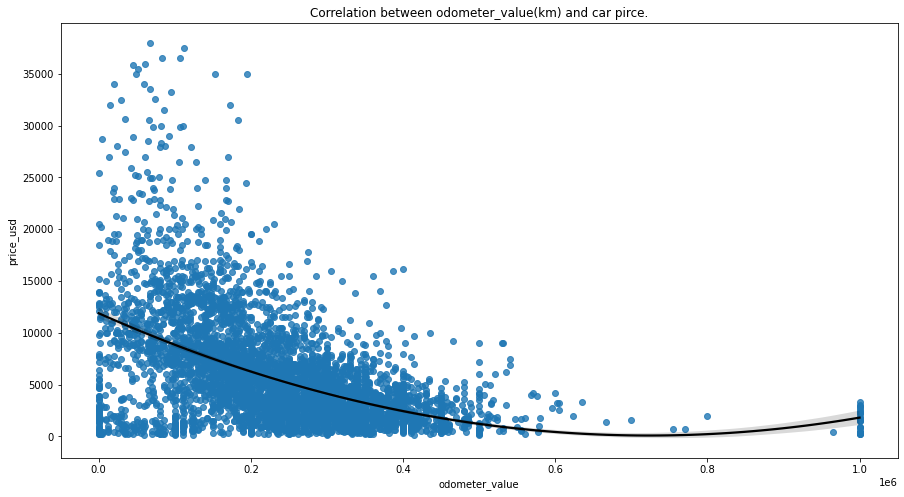

In [114]:
plt.figure(figsize=(15,8))

plt.title('Correlation between odometer_value(km) and car pirce.')
df_plt = df.head(5000)

ax = sns.regplot(x="odometer_value", y="price_usd", data=df_plt, 
                 line_kws={"color": "black"},order=2)

As you can see, there is a correlation between the price and the km that the vehicle travels up to a certain limit. That is, after the vehicle reaches 600,000 km, there is no longer a clear correlation between the price and the km, and from there it is difficult to determine a price based on the km.

Now let's see the average price for every year

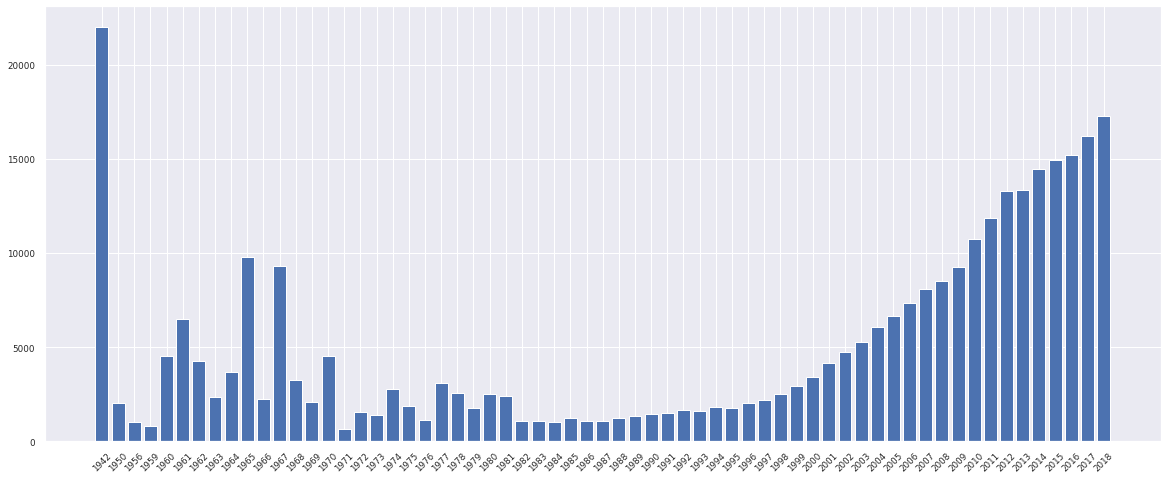

In [157]:
price_avg={}
min_year=df.year_produced.min()
max_year=df.year_produced.max()
for num in range(min_year.astype(int),max_year.astype(int)):
  df_year=df[df.year_produced==num]
  mean=df_year.price_usd.mean()
  if mean>0:
    price_avg[num]=mean
years = list(price_avg.keys())
price_year = list(price_avg.values())
plt.figure(figsize=(20,8))
plt.xticks(rotation = 45)
plt.bar(range(len(price_avg)), price_year, tick_label=years)
plt.show()

We can see that starting from 1982 there is an increase from year to year in car prices, which means that starting from 1982 the price of the car is affected by the year. Before 1982 there is no clear correlation between car prices per year.

let's see the correlation between odometer_value(km) and year producted

Now let's see the impect of the engine_capacity on the price

3D graph that shows correlation between engine_capacity,odometer_value and price.

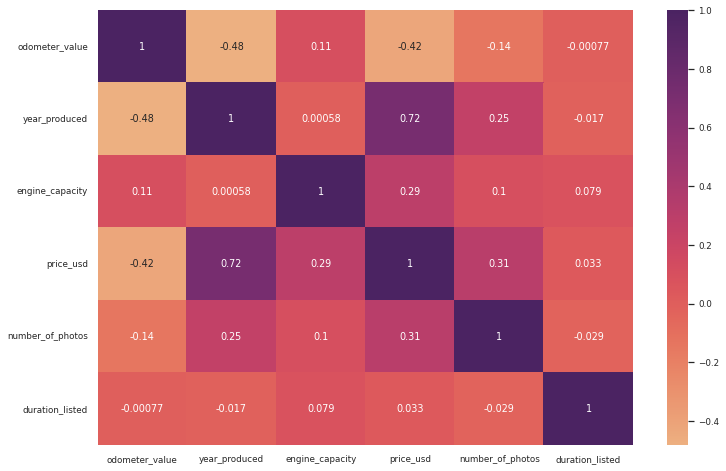

In [121]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap = sns.color_palette("flare", as_cmap=True))

As you can see, we got a pretty strong correlation of 0.72 between the year of manufacture and the price of the vehicle, but the year of manufacture is not enough to predict the price of the vehicle.
So the explanation for this is that only numerical values ​​were taken, so we know that there are other non-numerical characteristics that affect the price of the vehicle, such as the vehicle model and the company, which also have a strong impect on the price

# **PCA**

In [21]:
df1=df
category_columns=df.select_dtypes(include=['object','bool']).columns.tolist()
print(category_columns)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
for x in category_columns:
  encoder.fit(df[x])
  df1[x]= encoder.transform(df[x])

In [ ]:
df1

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

classes = df1['price_usd'].reset_index(drop=True)

features = df1.drop(['price_usd'], axis = 1) 
features_norm = StandardScaler().fit_transform(features)

In [ ]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(features_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])
principalDf["price"] = classes

pca.explained_variance_ratio_ 

array([0.14166457, 0.12270161])

In [ ]:
principalDf['pirce_bins'] = pd.cut(x=principalDf['price'], bins=[2000, 4500, 7000, 10000, 14000, 19000, 26000, 35000, 46000, 62000, 150000],
                    labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

principalDf.head()

,PC 1,PC 2,price,pirce_bins
0,2.063517,0.911046,10900.00,3
1,1.737183,1.250680,5000.00,1
2,0.788762,0.297495,2800.00,0
3,1.542917,0.127454,9999.00,2
4,1.751221,0.952281,2134.11,0


# **ANN-To classify the vehicle price range**

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torch.functional as F

In [ ]:
print('Shape of all dataset: {}'.format(df.shape))
var_columns = [c for c in principalDf if c not in ["pirce_bins","price"]]
x=principalDf.loc[:,var_columns]
y = principalDf.loc[:,'pirce_bins']
encoder.fit(y)
y= encoder.transform(y)
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)


Shape of all dataset: (38521, 18)
(30816, 2)
(30816,)
(7705, 2)
(7705,)


In [ ]:
x_train = torch.tensor(x_train.values, dtype=torch.float)
x_valid = torch.tensor(x_valid.values, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
y_valid = torch.tensor(y_valid, dtype=torch.float)
print(y_train[1:30])

tensor([5., 2., 2., 6., 9., 9., 1., 2., 1., 2., 1., 0., 0., 2., 1., 2., 1., 1.,
        2., 1., 9., 0., 2., 6., 1., 2., 9., 0., 0.])


In [ ]:
class NN(nn.Module):
  def __init__(self):
    super(NN,self).__init__()
    self.layer1=nn.Linear(x_train.shape[1],10)
    #self.layer2=nn.Linear(30,20)
    #self.layer3=nn.Linear(20,10)
    self.layer3=nn.ReLU()
    self.layer4=nn.ReLU()
    #self.layer4=nn.Sigmoid()
  def forward(self,x):
    x=self.layer1(x)
    #x=self.layer2(x)
    x=self.layer3(x)
    x=self.layer4(x)
   # x=self.layer4(x)
    return x

In [ ]:
#import torch.optim as optim
model1 = NN().to(device)
print(model1)
optimizer= torch.optim.Adam(model1.parameters(),lr=0.3)
loss_fn=nn.CrossEntropyLoss()

NN(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer3): ReLU()
  (layer4): ReLU()
)


In [ ]:
print(y_valid)

tensor([1., 9., 6.,  ..., 9., 3., 4.])


In [ ]:
y_train = torch.tensor(y_train,dtype=torch.long)

<ipython-input-114-6d63635beb05>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train,dtype=torch.long)


In [ ]:
epochs=500
for i in range(epochs):
  #initialize the model parameter
  optimizer.zero_grad(set_to_none=True)
  #calculate the loss
  x_train=x_train.to(device)
  y_train=y_train.to(device)
  output=model1(x_train)
  #print(output,y_train[k])
  #print(output.shape,y_train.shape)
  loss=loss_fn(output,y_train)
  #backpropagation
  loss.backward()
  #update the parameters
  optimizer.step()
  if(i%50==0):
    print(f"epochs: {i}......loss:{loss}")
print(output)

epochs: 0......loss:2.650768280029297
epochs: 50......loss:1.402816653251648
epochs: 100......loss:1.3932629823684692
epochs: 150......loss:1.3915561437606812
epochs: 200......loss:1.3905761241912842
epochs: 250......loss:1.3899321556091309
epochs: 300......loss:1.389545202255249
epochs: 350......loss:1.3892767429351807
epochs: 400......loss:1.389104962348938
epochs: 450......loss:1.388912320137024
tensor([[5.9933, 6.1313, 5.6281,  ..., 0.0000, 0.0000, 4.2941],
        [0.0163, 2.4277, 3.3878,  ..., 1.1379, 0.0000, 0.0000],
        [8.2590, 7.3980, 6.6668,  ..., 0.0000, 0.0000, 8.3665],
        ...,
        [4.0122, 4.8576, 4.9492,  ..., 0.0000, 0.0000, 1.6603],
        [0.0000, 1.6898, 3.1709,  ..., 1.2266, 0.0000, 0.0000],
        [5.2636, 5.5755, 5.4977,  ..., 0.0000, 0.0000, 3.8077]],
       grad_fn=<ReluBackward0>)


In [ ]:
y_valid.size(0)

7705

In [ ]:
y_valid = torch.tensor(y_valid,dtype=torch.long)

<ipython-input-118-bfdd840e4075>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_valid = torch.tensor(y_valid,dtype=torch.long)


In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    #for i,x in enumerate(x_valid):
    outputs = model1(x_valid)
        # max returns (value ,index)
    _, predicted = torch.max(outputs.data, 1)
    n_samples += y_valid.size(0)
    n_correct += (predicted == (y_valid)).sum().item()
    print(y_valid,predicted)
acc= 100.0 * n_correct / n_samples
print(f'accuracy={acc}')

tensor([1, 9, 6,  ..., 9, 3, 4]) tensor([9, 0, 4,  ..., 9, 0, 2])
accuracy=41.31083711875406


In [ ]:
print(f'{list(y_valid[1:20])},\n{list((predicted[1:20]))}')

[tensor(9.), tensor(6.), tensor(0.), tensor(4.), tensor(1.), tensor(4.), tensor(5.), tensor(4.), tensor(1.), tensor(2.), tensor(4.), tensor(3.), tensor(1.), tensor(0.), tensor(9.), tensor(2.), tensor(0.), tensor(4.), tensor(1.)],
[tensor(0), tensor(4), tensor(9), tensor(2), tensor(1), tensor(4), tensor(3), tensor(2), tensor(2), tensor(0), tensor(2), tensor(0), tensor(0), tensor(0), tensor(0), tensor(2), tensor(0), tensor(2), tensor(0)]


In [ ]:
data=df

# **lest try to implement an ann on the real data with bins **

In [ ]:
df2=df

In [ ]:
df=df2

In [ ]:
df_ann=df

In [ ]:
df_ann

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,9,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,12,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,4,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,9,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,5,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,4,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,3,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,7,490


In [ ]:
df_ann['pirce_bins'] = pd.cut(x=df_ann['price_usd'], bins=[2000, 4500, 7000, 10000, 14000, 19000, 26000, 35000, 46000, 62000, 150000],
                    labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [ ]:
del df_ann["price_usd"]

In [ ]:
df_ann

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,duration_listed,pirce_bins
0,45,763,0,8,190000,2010,2,0,1,2.5,10,0,2,0,10900.00,0,9,16,3
1,45,763,0,1,290000,2002,2,0,1,3.0,10,0,2,0,5000.00,1,12,83,1
2,45,519,0,7,402000,2001,2,0,1,2.5,9,0,2,0,2800.00,1,4,151,0
3,45,609,1,1,10000,1999,2,0,1,3.0,8,0,2,0,9999.00,1,9,86,2
4,45,664,0,0,280000,2001,2,0,1,2.5,10,0,2,0,2134.11,1,14,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,8,86,0,8,290000,2000,2,0,1,3.5,8,0,2,1,2750.00,1,5,301,0
38527,8,765,1,1,321000,2004,0,0,0,2.2,2,0,2,1,4800.00,1,4,317,1
38528,8,86,0,1,777957,2000,2,0,1,3.5,8,0,2,1,4300.00,0,3,369,0
38529,8,765,1,0,20000,2001,2,0,1,2.0,6,0,2,1,4000.00,1,7,490,0


In [ ]:
print('Shape of all dataset: {}'.format(df.shape))
var_columns = [c for c in df_ann if c not in ["pirce_bins","price_usd"]]
x=df_ann.loc[:,var_columns]
y = df_ann.loc[:,'pirce_bins']

Shape of all dataset: (38521, 18)


In [ ]:
df_ann

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,is_exchangeable,number_of_photos,duration_listed,pirce_bins
0,45,763,0,8,2447,54,2,0,1,19,10,0,2,0,0,8,16,3
1,45,763,0,1,3953,46,2,0,1,24,10,0,2,0,1,11,83,1
2,45,519,0,7,5333,45,2,0,1,19,9,0,2,0,1,3,151,0
3,45,609,1,1,236,43,2,0,1,24,8,0,2,0,1,8,86,2
4,45,664,0,0,3794,45,2,0,1,19,10,0,2,0,1,13,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,8,86,0,8,3953,44,2,0,1,29,8,0,2,1,1,4,301,0
38527,8,765,1,1,4389,48,0,0,0,16,2,0,2,1,1,3,317,1
38528,8,86,0,1,6024,44,2,0,1,29,8,0,2,1,0,2,365,0
38529,8,765,1,0,331,45,2,0,1,14,6,0,2,1,1,6,477,0


In [ ]:
features = df_ann.drop(['pirce_bins'], axis = 1) 
features_norm = StandardScaler().fit_transform(features)
print(features)

In [ ]:
encoder.fit(y)
y= encoder.transform(y)
x_train, x_valid, y_train, y_valid = train_test_split(features_norm, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(30816, 17)
(30816,)
(7705, 17)
(7705,)


In [ ]:
x_train = torch.tensor(x_train, dtype=torch.float)
x_valid = torch.tensor(x_valid, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
y_valid = torch.tensor(y_valid, dtype=torch.float)

<ipython-input-312-f5077920dcfd>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype=torch.float)


In [ ]:
class NN(nn.Module):
  def __init__(self):
    super(NN,self).__init__()
    self.layer1=nn.Linear(x_train.shape[1],10)
    self.layer2=nn.ReLU()
  def forward(self,x):
    x=self.layer1(x)
    x=self.layer2(x)
    return x

In [ ]:
y_train = torch.tensor(y_train,dtype=torch.long)

<ipython-input-314-6d63635beb05>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train,dtype=torch.long)


In [ ]:
#import torch.optim as optim
model1 = NN().to(device)
print(model1)
optimizer= torch.optim.Adam(model1.parameters(),lr=0.3)
loss_fn=nn.CrossEntropyLoss()

NN(
  (layer1): Linear(in_features=17, out_features=10, bias=True)
  (layer3): ReLU()
)


In [ ]:
epochs=500
for i in range(epochs):
  #initialize the model parameter
  optimizer.zero_grad(set_to_none=True)
  #calculate the loss
  x_train=x_train.to(device)
  y_train=y_train.to(device)
  output=model1(x_train)
  loss=loss_fn(output,y_train)
  #backpropagation
  loss.backward()
  #update the parameters
  optimizer.step()
  if(i%50==0):
    print(f"epochs: {i}......loss:{loss}")
print(output)

epochs: 0......loss:2.3531906604766846
epochs: 50......loss:1.0448616743087769
epochs: 100......loss:1.0328285694122314
epochs: 150......loss:1.0287997722625732
epochs: 200......loss:1.026591420173645
epochs: 250......loss:1.0250978469848633
epochs: 300......loss:1.0233862400054932
epochs: 350......loss:1.0211907625198364
epochs: 400......loss:1.0200035572052002
epochs: 450......loss:1.0190856456756592
tensor([[10.1610, 12.9406, 14.2282,  ...,  1.4314,  0.0000,  6.4513],
        [ 7.2704, 11.8522, 15.1046,  ..., 16.9528,  0.0000,  1.8068],
        [ 7.1321,  8.5206,  8.3585,  ...,  0.0000,  0.0000,  4.1745],
        ...,
        [14.5457, 16.4349, 16.7169,  ...,  0.1049,  0.0000, 10.1442],
        [ 5.9736,  9.8373, 12.4802,  ..., 10.0705,  0.0000,  1.0030],
        [11.8218, 15.3133, 17.5065,  ...,  6.1418,  0.0000,  7.1232]],
       grad_fn=<ReluBackward0>)


In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    #for i,x in enumerate(x_valid):
    outputs = model1(x_valid)
        # max returns (value ,index)
    _, predicted = torch.max(outputs.data, 1)
    n_samples += y_valid.size(0)
    n_correct += (predicted == (y_valid)).sum().item()
    print(y_valid,predicted)
acc= 100.0 * n_correct / n_samples
print(f'accuracy={acc}')

tensor([1., 9., 6.,  ..., 9., 3., 4.]) tensor([1, 9, 5,  ..., 9, 2, 4])
accuracy=57.97534068786502
